<a href="https://colab.research.google.com/github/k-washi/python-cookbook/blob/master/ml/1/preprocessingML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 欠損値の代入

In [0]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
              1.0,2.0,3.0,4.0
              5.0, 6.0,,8.0
              10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))

In [2]:
print(pd.__version__)

0.25.3


In [3]:
print(df)

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


In [4]:
print(df.isnull().sum())

A    0
B    0
C    1
D    1
dtype: int64


In [5]:
print(df.dropna(axis=0))

     A    B    C    D
0  1.0  2.0  3.0  4.0


In [6]:
print(df.dropna(axis=1))

      A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0


In [7]:
print(df.dropna(thresh=4))

     A    B    C    D
0  1.0  2.0  3.0  4.0


In [8]:
print(df.dropna(subset=['C']))

      A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN


平均値で補完

In [9]:
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(imputed_data)

[[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]


In [10]:
print(df.fillna(df.mean()))

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   7.5  8.0
2  10.0  11.0  12.0  6.0


In [11]:
df = pd.DataFrame([
['green', 'M', 10.1, 'class2'],
['red', 'L', 13.5, 'class1'],
['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']

print(df)

   color size  price classlabel
0  green    M   10.1     class2
1    red    L   13.5     class1
2   blue   XL   15.3     class2


In [12]:
size_mapping = {'XL':3, 'L':2, 'M':1}
df['size'] = df['size'].map(size_mapping)
print(df)

   color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2


In [13]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [14]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [15]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [16]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

onehot エンコーディング

In [17]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
print(X)
X[:, 0] = color_le.fit_transform(X[:, 0])
print(X)

[['green' 1 10.1]
 ['red' 2 13.5]
 ['blue' 3 15.3]]
[[1 1 10.1]
 [2 2 13.5]
 [0 3 15.3]]


In [18]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
print(X[:, 0].reshape(-1, 1))
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

[['green']
 ['red']
 ['blue']]


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [19]:
from sklearn.compose import ColumnTransformer
c_transf = ColumnTransformer([ 
('onehot', OneHotEncoder(), [0]),
('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [20]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [21]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [22]:
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([ 
('onehot', color_ohe, [0]),
('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

# データセットの準備例

In [0]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [0]:
df_wine.columns = ['Class label', 'Alcohol',
...                    'Malic acid', 'Ash',
...                    'Alcalinity of ash', 'Magnesium',
...                    'Total phenols', 'Flavanoids',
...                    'Nonflavanoid phenols',
...                    'Proanthocyanins',
...                    'Color intensity', 'Hue',
...                    'OD280/OD315 of diluted wines',
...                    'Proline']

In [25]:
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


stratifyは、訓練データとテストデータの両方が元データのクラス比率と同じになるようにする。

In [0]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# 特徴のスケーリング

In [0]:
from sklearn.preprocessing import MinMaxScaler #0,1スケール
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

分散による標準化

In [0]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

データセットが小さいとき、RobustScalerなどが有効
中央値を削除し、データセットの1番目と3番目の四分位数（つまり、それぞれ25番目と75番目の変位値）に従ってデータセットをスケーリングして、より極端な値と外れ値が目立たなくなるようにする

# 正規化

solver='lbfgs'はL1正規化をサポートしていない。

In [29]:
from sklearn.linear_model import LogisticRegression
#C=1がデフォルト。Cにより正規化の影響度を変更できる。
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')

lr.fit(X_train_std, y_train)
print('Training acc: ', lr.score(X_train_std, y_train))
print('Test acc: ', lr.score(X_test_std, y_test))

Training acc:  1.0
Test acc:  1.0


In [30]:
#w0
lr.intercept_

array([-1.26351675, -1.21577161, -2.37090611])

In [31]:
#wxの重み
lr.coef_

array([[ 1.24578499,  0.18064644,  0.74210486, -1.16015927,  0.        ,
         0.        ,  1.16908383,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54794631,  2.51030086],
       [-1.53792082, -0.38663329, -0.99536379,  0.36448194, -0.05928405,
         0.        ,  0.66770534,  0.        ,  0.        , -1.93318489,
         1.2354624 ,  0.        , -2.23242245],
       [ 0.13540184,  0.16975241,  0.35791212,  0.        ,  0.        ,
         0.        , -2.43447536,  0.        ,  0.        ,  1.56250873,
        -0.81750505, -0.49660002,  0.        ]])

正規化に対する重みの影響 - Cが小さい(強力な正規化)のペナルティーを貸した場合、重みがゼロになる。

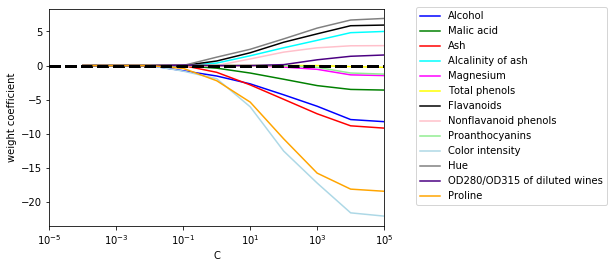

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow', 'black','pink', 'lightgreen', 'lightblue','gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4., 6.):
  lr = LogisticRegression(penalty='l1', C=10**c, solver='liblinear', multi_class='ovr', random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:, column],label=df_wine.columns[column + 1],color=color)
  plt.axhline(0, color='black', linestyle='--', linewidth=3)
  plt.xlim([10**(-5), 10**5])
  plt.ylabel('weight coefficient')
  plt.xlabel('C')
  plt.xscale('log')
  plt.legend(loc='upper left')
  ax.legend(loc='upper center',bbox_to_anchor=(1.38, 1.03),ncol=1, fancybox=True)
plt.show()

# 次元削除

順次特徴選択アルゴリズム - 次元削除のカテゴリは特徴選択(サブセット作成)と特徴抽出(新しい特徴空間生成)がある。

## sequential backward selection (SBS)

基準関数(J)を最小化するように、削除する特徴を決定していく。

In [0]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
class SBS():
    def __init__(self, estimator, k_features,scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)
    
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
        
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)
k_feat = [len(k) for k in sbs.subsets_]

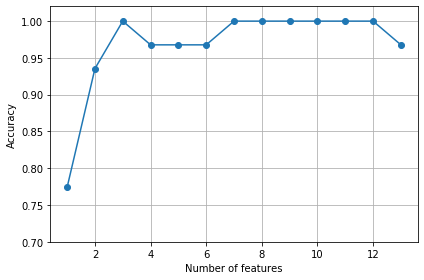

In [35]:
plt.figure()
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [36]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [37]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [38]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


# 特徴の重要度

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


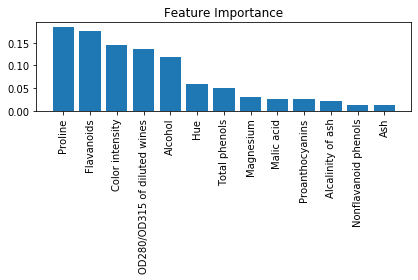

In [39]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

相関が高い情報がある場合は、一方が高くなり、逆に一方の特徴が低くなる可能性がある。
以下モデルのフィッティング後に、ユーザ指定のしきい値に基づいて特徴を選択する。

In [42]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Num of features that meet this threshold', X_selected.shape)
for f in range(X_selected.shape[1]):
  print(feat_labels[indices[f]], importances[indices[f]])

Num of features that meet this threshold (124, 5)
Proline 0.18545260453273973
Flavanoids 0.17475097557788732
Color intensity 0.14391990337231414
OD280/OD315 of diluted wines 0.1361619442214559
Alcohol 0.11852941731789315


# 次元削除によるデータの圧縮

データを新しい特徴空間に変換する特徴抽出を行う。利点として、ストレージスペースや学習の計算効率を改善するだけでなく、次元の呪いをへらすことで予測パフォーマンスを改善することが可能になる。

In [66]:
cov_mat = np.cov(X_train_std.T)
eig_val, eig_vec = np.linalg.eig(cov_mat)
print(eig_val)
print(eig_vec.shape)

[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]
(13, 13)


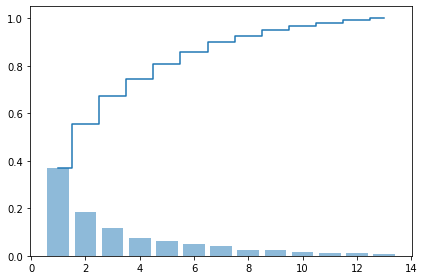

In [51]:
tot = sum(eig_val)
var_exp = [(i/tot) for i in sorted(eig_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, len(cum_var_exp)+1), var_exp, alpha=0.5, align='center', label='Ind exp variance')
plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where='mid', label='Cum exp variance')
plt.tight_layout()
plt.show()


In [0]:
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:, i]) for i in range(len(eig_val))]

In [76]:
#射影行列
w = np.hstack((eig_pairs[0][1][:, np.newaxis], eig_pairs[1][1][:, np.newaxis]))
print(w)

[[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [77]:
#PCA部分空間への変換
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [0]:
X_train_pca = X_train_std.dot(w)

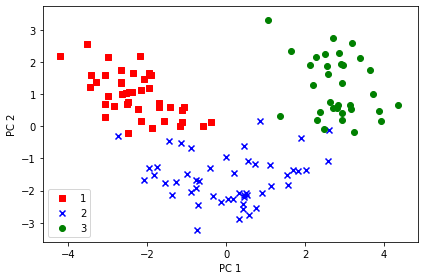

In [79]:
plt.figure()
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==l, 0],X_train_pca[y_train==l, 1],c=c, label=l, marker=m)
  plt.xlabel('PC 1')
  plt.ylabel('PC 2')
  plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

scikit-learnにおけるPCA

In [0]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

In [0]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',random_state=1,solver='lbfgs')
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

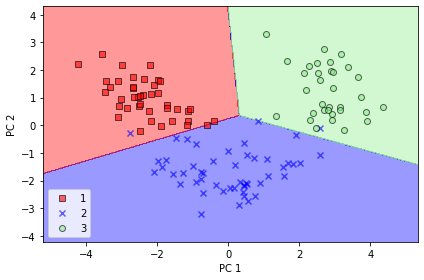

In [84]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

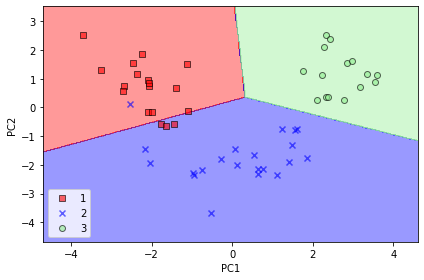

In [85]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [87]:
#PCAの各分散比
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

## LDA

非正規化モデルの次元呪いによる計算効率を高め、過剰適合の程度をへらすことが可能。
PCAはデータセット内の最大分散の直交成分軸を見つけるがLDAは、クラスの分離性を最大化する特徴部分空間を見つけることを目標としている。

In [92]:
np.set_printoptions(precision=4) #表示形式を4桁に設定
mean_vecs = []
for label in range(1,4):
  mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
  print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [101]:
d= 13
#クラス内分散行列
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
  #class_scatter = np.zeros((d, d))
  """for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
  """
  class_scatter = np.cov(X_train_std[y_train==label].T)
  S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [100]:
mean_overall = np.mean(X_train_std, axis=0)
#クラス間分散行列
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
  n = X_train_std[y_train == i + 1, :].shape[0]
  mean_vec = mean_vec.reshape(d, 1) # make column vector
  mean_overall = mean_overall.reshape(d, 1)
  S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [0]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [103]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
  print(eigen_val[0])

Eigenvalues in descending order:

349.61780890599397
172.7615221897938
3.389259780547781e-14
2.842170943040401e-14
1.9284611807586422e-14
1.9284611807586422e-14
1.8639179987230033e-14
1.8639179987230033e-14
7.057897559458914e-15
7.057897559458914e-15
6.596592553773414e-15
3.81059209269662e-15
3.3908455462202616e-15


In [0]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,  eigen_pairs[1][1][:, np.newaxis].real))

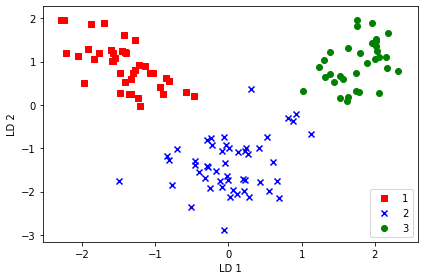

In [105]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1] * (-1), c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## scikit-lelarnを用いたLDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

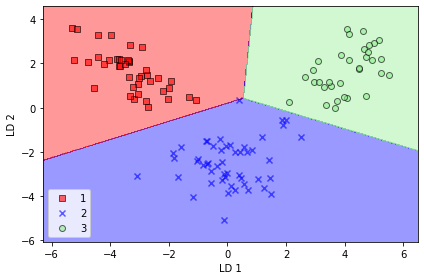

In [110]:
lr = LogisticRegression(multi_class='ovr', random_state=1,solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## カーネルPCA
カーネル関数を用いてデータを高次元の空間に非線形マッピングする。

In [0]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
def rbf_kernel_pca(X, gamma, n_components):
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)
    
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    # Collect the top k eigenvectors (projected examples)
    alphas = np.column_stack([eigvecs[:, i]
                             for i in range(n_components)])
    
    # Collect the corresponding eigenvalues
    lambdas = [eigvals[i] for i in range(n_components)]
    return alphas, lambdas

カーネルPCAの例

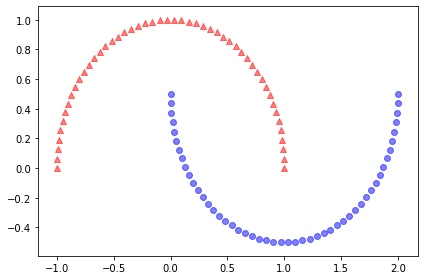

In [117]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

PCAの場合

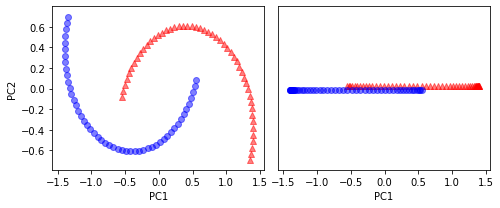

In [112]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

kernal PCAの場合

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  


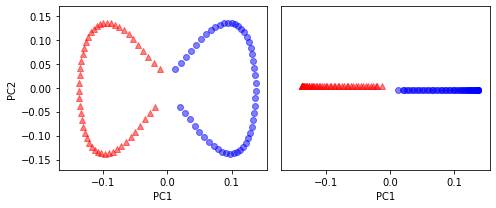

In [119]:
X_kpca, lambdas = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

## sciket-learnの例

In [0]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2,kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

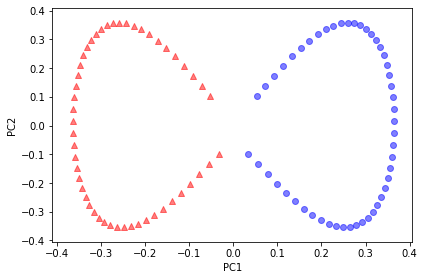

In [121]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1],color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1],color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()